# Support Vector Machine
Support Vector Machine (SVM) is a supervised machine learning algorithm used for both classification and regression. Though we say regression problems as well it’s best suited for classification. The main objective of the SVM algorithm is to find the optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space. The hyperplane tries that the margin between the closest points of different classes should be as maximum as possible. The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three, then the hyperplane becomes a 2-D plane. It becomes difficult to imagine when the number of features exceeds three.

Problem 1) Prepare a classification model using SVM for salary data <br>

Data Description:<br>

* age -- age of a person
* workclass	-- A work class is a grouping of work
* education	-- Education of an individuals
* maritalstatus -- Marital status of an individulas
* occupation	 -- occupation of an individuals
* relationship --
* race --  Race of an Individual
* sex --  Gender of an Individual
* capitalgain --  profit received from the sale of an investment
* capitalloss	-- A decrease in the value of a capital asset
* hoursperweek -- number of hours work per week
* native -- Native of an individual
* Salary -- salary of an individual


In [1]:
#SVM Classification
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC

# Supressing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train(1) (1).csv to SalaryData_Train(1) (1).csv
Saving SalaryData_Test(1) (1).csv to SalaryData_Test(1) (1).csv


In [3]:
#Loading train dataset
traindata=pd.read_csv('SalaryData_Train(1) (1).csv')
traindata

age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
0            Adm-clerical   Not-in-family   White     Male         2174   
1         Exec-managerial         Husband   White     Male            0   
2       Handlers-cleaners   Not-in-family   White     Male            0   
3       Handlers-cleaners         Husband   Black     Male            0   
4          Prof-specialty            Wife   Black   Female            0   
...                   ...             ...     ...      ...          ...   
30156        Tech-support            Wife   White   Female            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30158        Adm-clerical       Unmarried   White   Female            0   
30159        Adm-clerical       Own-child   White     Male            0   
30160     Exec-managerial            Wife   White   Female        15024   

       capitalloss  hoursperweek          native  Salary  
0                0            40   United-States   <=50K  
1                0            13   United-States   <=50K  
2                0            40   United-States   <=50K  
3                0            40   United-States   <=50K  
4                0            40            Cuba   <=50K  
...            ...           ...             ...     ...  
30156            0            38   United-States   <=50K  
30157            0            40   United-States    >50K  
30158            0            40   United-States   <=50K  
30159            0            20   United-States   <=50K  
30160            0            40   United-States    >50K  

[30161 rows x 14 columns]

In [4]:
#Loading test dataset

testdata=pd.read_csv('SalaryData_Test(1) (1).csv')
testdata

age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0                0            0            40   United-States   <=50K  
1                0            0            50   United-States   <=50K  
2                0            0            40   United-States    >50K  
3             7688            0            40   United-States    >50K  
4                0            0            30   United-States   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[15060 rows x 14 columns]

In [5]:
print(traindata.columns)
print(traindata.shape)

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')
(30161, 14)


In [6]:
print(testdata.columns)
print(testdata.shape)

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')
(15060, 14)


In [7]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
traindata.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [10]:
testdata.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
#train data doesn't have any null value.
#test data doesn't have any null value.

In [12]:
#Catagorical columns=[ 'workclass', 'education','maritalstatus','occupation', 'relationship', 'race', 'sex','native', 'Salary']
#Numerical columns=['age','educationno','capitalgain','capitalloss', 'hoursperweek']

In [13]:
traindata.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000  30161.000000  30161.000000
mean      38.438115     10.121316   1092.044064     88.302311     40.931269
std       13.134830      2.550037   7406.466611    404.121321     11.980182
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000

In [14]:
testdata.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  15060.000000  15060.000000  15060.000000  15060.000000  15060.000000
mean      38.768327     10.112749   1120.301594     89.041899     40.951594
std       13.380676      2.558727   7703.181842    406.283245     12.062831
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       48.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   3770.000000     99.000000

In [15]:
#train & test data are similar

In [16]:
#combining train and test data

data=traindata.append(testdata)
data

age          workclass   education  educationno        maritalstatus  \
0       39          State-gov   Bachelors           13        Never-married   
1       50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2       38            Private     HS-grad            9             Divorced   
3       53            Private        11th            7   Married-civ-spouse   
4       28            Private   Bachelors           13   Married-civ-spouse   
...    ...                ...         ...          ...                  ...   
15055   33            Private   Bachelors           13        Never-married   
15056   39            Private   Bachelors           13             Divorced   
15057   38            Private   Bachelors           13   Married-civ-spouse   
15058   44            Private   Bachelors           13             Divorced   
15059   35       Self-emp-inc   Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0            Adm-clerical   Not-in-family                White     Male   
1         Exec-managerial         Husband                White     Male   
2       Handlers-cleaners   Not-in-family                White     Male   
3       Handlers-cleaners         Husband                Black     Male   
4          Prof-specialty            Wife                Black   Female   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0             2174            0            40   United-States   <=50K  
1                0            0            13   United-States   <=50K  
2                0            0            40   United-States   <=50K  
3                0            0            40   United-States   <=50K  
4                0            0            40            Cuba   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[45221 rows x 14 columns]

In [17]:
#reseting index number by droping existing index number

data.reset_index(inplace=True,drop=True)

data

age          workclass   education  educationno        maritalstatus  \
0       39          State-gov   Bachelors           13        Never-married   
1       50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2       38            Private     HS-grad            9             Divorced   
3       53            Private        11th            7   Married-civ-spouse   
4       28            Private   Bachelors           13   Married-civ-spouse   
...    ...                ...         ...          ...                  ...   
45216   33            Private   Bachelors           13        Never-married   
45217   39            Private   Bachelors           13             Divorced   
45218   38            Private   Bachelors           13   Married-civ-spouse   
45219   44            Private   Bachelors           13             Divorced   
45220   35       Self-emp-inc   Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0            Adm-clerical   Not-in-family                White     Male   
1         Exec-managerial         Husband                White     Male   
2       Handlers-cleaners   Not-in-family                White     Male   
3       Handlers-cleaners         Husband                Black     Male   
4          Prof-specialty            Wife                Black   Female   
...                   ...             ...                  ...      ...   
45216      Prof-specialty       Own-child                White     Male   
45217      Prof-specialty   Not-in-family                White   Female   
45218      Prof-specialty         Husband                White     Male   
45219        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
45220     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0             2174            0            40   United-States   <=50K  
1                0            0            13   United-States   <=50K  
2                0            0            40   United-States   <=50K  
3                0            0            40   United-States   <=50K  
4                0            0            40            Cuba   <=50K  
...            ...          ...           ...             ...     ...  
45216            0            0            40   United-States   <=50K  
45217            0            0            36   United-States   <=50K  
45218            0            0            50   United-States   <=50K  
45219         5455            0            40   United-States   <=50K  
45220            0            0            60   United-States    >50K  

[45221 rows x 14 columns]

## EDA

In [18]:
data.corr()

age  educationno  capitalgain  capitalloss  hoursperweek
age           1.000000     0.037623     0.079682     0.059426      0.101992
educationno   0.037623     1.000000     0.126907     0.081741      0.146206
capitalgain   0.079682     0.126907     1.000000    -0.032095      0.083880
capitalloss   0.059426     0.081741    -0.032095     1.000000      0.054220
hoursperweek  0.101992     0.146206     0.083880     0.054220      1.000000

In [19]:
#pairplot
sns.pairplot(data=data)

Comment:<br>
There is no significant relationship between the features.

In [20]:
#checking for unique values in categorical columns

categorical_columns=[ 'workclass', 'education','maritalstatus','occupation',
                     'relationship', 'race', 'sex','native', 'Salary']

for i in categorical_columns:
  unique_counts=data[i].value_counts()
  print('Column:-',i)
  print(unique_counts)
  print()



''' Inference : Data has various no of uneven counts for each catergories in every categorical column'''

Column:- workclass
 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

Column:- education
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64

Column:- maritalstatus
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64

Column:- occupation
 Craft-repair         6020
 Prof-specialt

' Inference : Data has various no of uneven counts for each catergories in every categorical column'

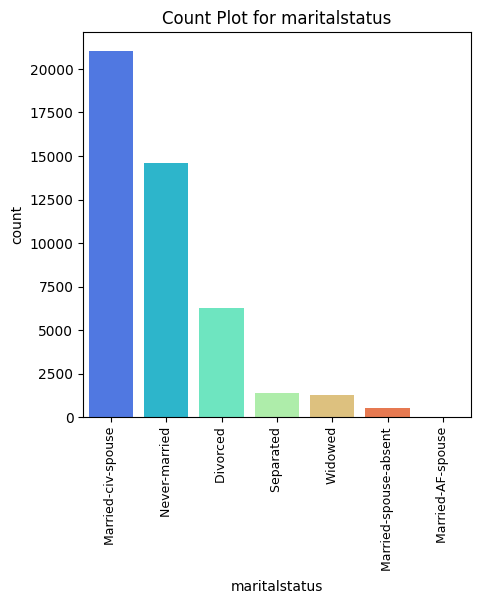

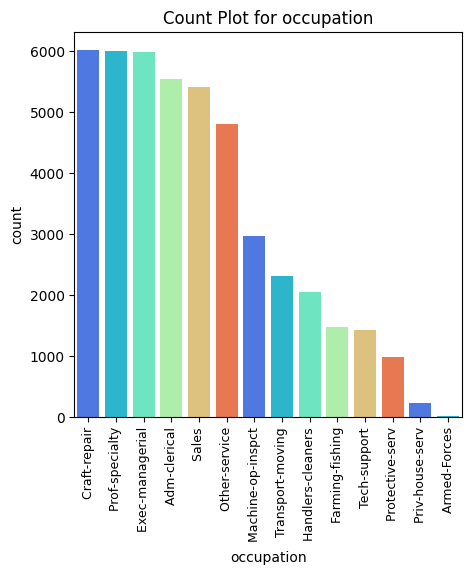

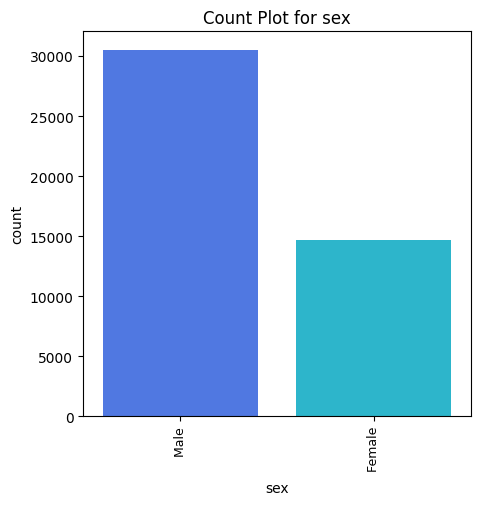

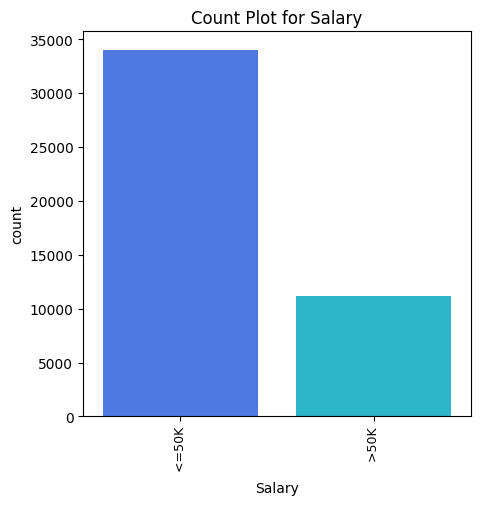

In [21]:
#graphical representation of the value counts of each catagorical column in the data

categorical_columns=[ 'workclass', 'education','maritalstatus','occupation',
                     'relationship', 'race', 'sex','native', 'Salary']

for i in categorical_columns:
  plt.figure(figsize=(5,5))
  colors=sns.color_palette('rainbow')
  sns.countplot(x=i,data=data,palette=colors,order=data[i].value_counts().index)
  plt.xticks(rotation=90,fontsize=9)
  plt.title(f'Count Plot for {i}')
  plt.show()

In [22]:
'''
The above plot helps us in understanding the column values of our dataset better,
Like the categories with highest occurences
'''

'\nThe above plot helps us in understanding the column values of our dataset better,\nLike the categories with highest occurences\n'

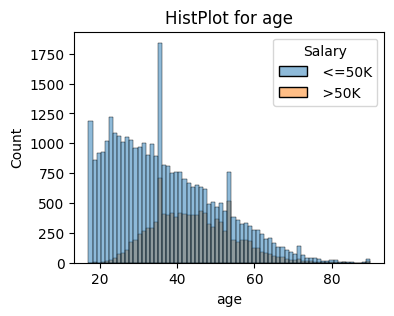

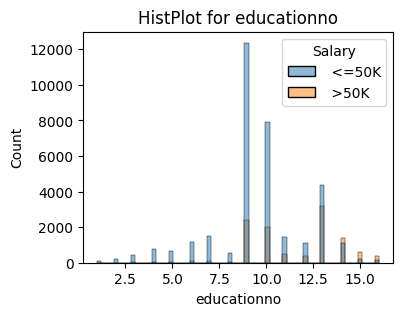

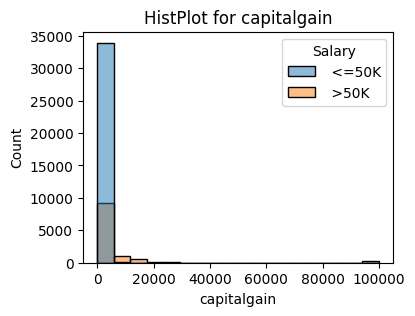

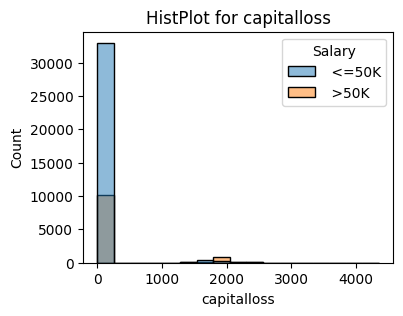

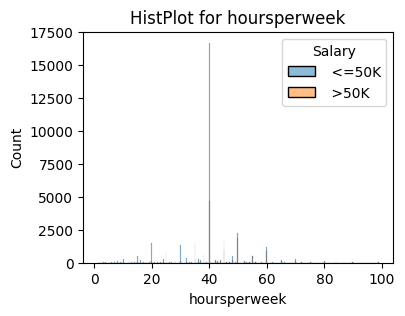

In [23]:
num_columns=['age','educationno','capitalgain','capitalloss', 'hoursperweek']
for i in num_columns:
  plt.figure(figsize=(4,3))
  sns.histplot(x=i, data=data, hue='Salary')
  plt.title(f'HistPlot for {i}')
  plt.show()

In [24]:
#Salary is target variable

data['Salary'].value_counts()

 <=50K    34013
 >50K     11208
Name: Salary, dtype: int64

## Data Preprocessing

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

categorical_columns=[ 'workclass', 'education','maritalstatus','occupation',
                     'relationship', 'race', 'sex','native']

for i in categorical_columns:
  data[i]=label_encoder.fit_transform(data[i])

In [26]:
data.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   39          5          9           13              4           0   
1   50          4          9           13              2           3   
2   38          2         11            9              0           5   
3   53          2          1            7              2           5   
4   28          2          9           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1         2174            0            40      37   
1             0     4    1            0            0            13      37   
2             1     4    1            0            0            40      37   
3             0     2    1            0            0            40      37   
4             5     2    0            0            0            40       4   

   Salary  
0   <=50K  
1   <=50K  
2   <=50K  
3   <=50K  
4   <=50K

In [27]:
data.shape

(45221, 14)

In [28]:
X=data.iloc[:,:-1]      #Features

In [29]:
print(X.shape)

(45221, 13)


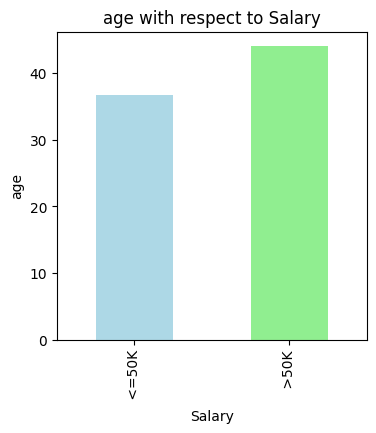

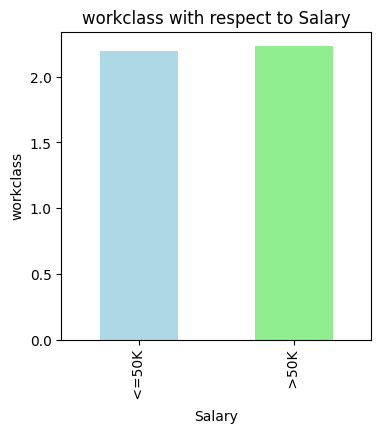

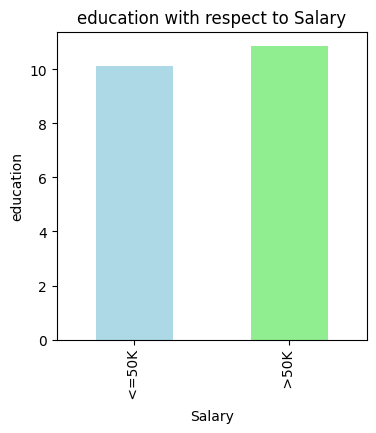

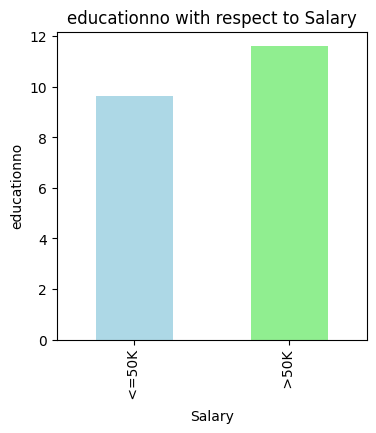

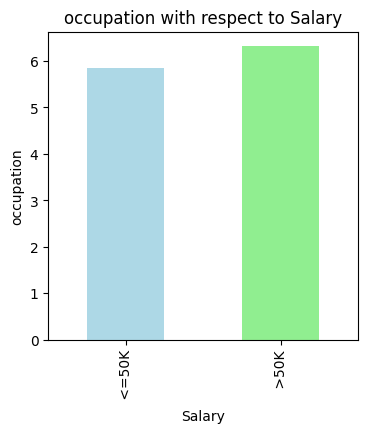

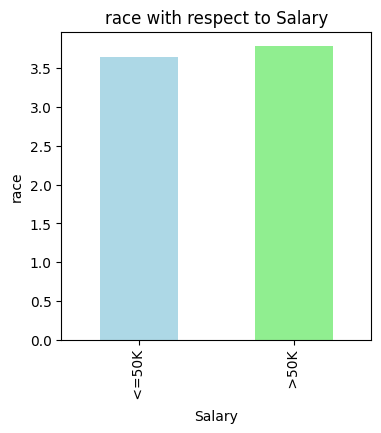

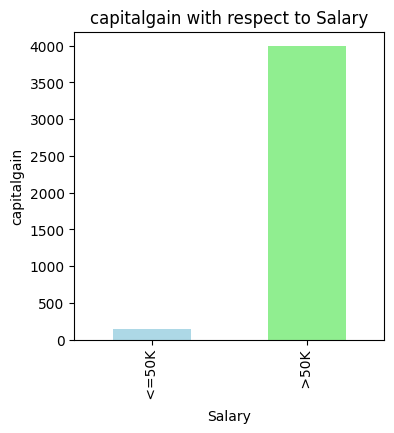

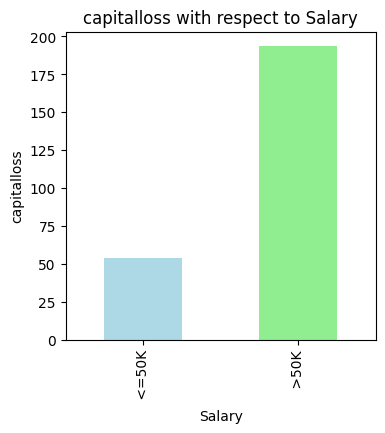

In [30]:
#Plotting features withrespect to target variable

for i in X:
  i_by_salary=data.groupby('Salary')[i].mean()
  plt.figure(figsize=(4,4))
  i_by_salary.plot(kind='bar',color=['lightblue','lightgreen'])
  plt.xlabel('Salary')
  plt.ylabel(i)
  plt.title(f'{i} with respect to Salary')

In [31]:
label_encoder=LabelEncoder()
data['Salary']=label_encoder.fit_transform(data['Salary'])

In [32]:
#Scaling the data

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_feature=scaler.fit_transform(X)

In [33]:
scaled_feature

array([[ 0.03418971,  2.91768179, -0.34404887, ..., -0.21872833,
        -0.07812093,  0.26444339],
       [ 0.86639866,  1.87397267, -0.34404887, ..., -0.21872833,
        -2.32671417,  0.26444339],
       [-0.04146565, -0.21344557,  0.17992971, ..., -0.21872833,
        -0.07812093,  0.26444339],
       ...,
       [-0.04146565, -0.21344557, -0.34404887, ..., -0.21872833,
         0.75469138,  0.26444339],
       [ 0.4124665 , -0.21344557, -0.34404887, ..., -0.21872833,
        -0.07812093,  0.26444339],
       [-0.26843172,  0.83026355, -0.34404887, ..., -0.21872833,
         1.58750369,  0.26444339]])

In [34]:
x_train,x_test,y_train,y_test=train_test_split(scaled_feature,data['Salary'],test_size=0.3,random_state=10,shuffle=True)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(31654, 13)
(13567, 13)
(31654,)
(13567,)


In [36]:
data['Salary'].value_counts()

0    34013
1    11208
Name: Salary, dtype: int64

In [37]:
#data is imbalanced therefore we look for f1 score

## Model

In [38]:
clf=SVC()
clf.fit(x_train,y_train)

SVC()

In [39]:
#Accuracy for training dataset

pred_train=clf.predict(x_train)
clf_report=pd.DataFrame(classification_report(y_train,pred_train,output_dict=True))
print('Train Result \n ======================================================')
print(f'Accuracy Score: {accuracy_score(y_train,pred_train)}')
print('_________________________________________________________')
print(f'Classification Reprot: \n {clf_report}')
print('_________________________________________________________')
print(f'Confussion Matrix: \n {confusion_matrix(y_train,pred_train)}')

Train Result 
Accuracy Score: 0.8518670626145195
_________________________________________________________
Classification Reprot: 
                       0            1  accuracy     macro avg  weighted avg
precision      0.870623     0.769857  0.851867      0.820240      0.845574
recall         0.942989     0.576439  0.851867      0.759714      0.851867
f1-score       0.905363     0.659254  0.851867      0.782308      0.844182
support    23785.000000  7869.000000  0.851867  31654.000000  31654.000000
_________________________________________________________
Confussion Matrix: 
 [[22429  1356]
 [ 3333  4536]]


In [40]:
#Accuracy for testing dataset

pred_test=clf.predict(x_test)
clf_report=pd.DataFrame(classification_report(y_test,pred_test,output_dict=True))
print('Test Result \n ======================================================')
print(f'Accuracy Score: {accuracy_score(y_test,pred_test)}')
print('_________________________________________________________')
print(f'Classification Reprot: \n {clf_report}')
print('_________________________________________________________')
print(f'Confussion Matrix: \n {confusion_matrix(y_test,pred_test)}')

Test Result 
Accuracy Score: 0.8444018574482199
_________________________________________________________
Classification Reprot: 
                       0            1  accuracy     macro avg  weighted avg
precision      0.867451     0.743458  0.844402      0.805454      0.836935
recall         0.936742     0.561545  0.844402      0.749144      0.844402
f1-score       0.900766     0.639823  0.844402      0.770294      0.836545
support    10228.000000  3339.000000  0.844402  13567.000000  13567.000000
_________________________________________________________
Confussion Matrix: 
 [[9581  647]
 [1464 1875]]


Comment:<br>

Hence by merging the train and test dataset we can infer that there is no potential risk of Overfitting <BR>
As the Train Result and the Test Results shows significant Accuracy

Now let use the training and testing dataset provided seperately and preprocess and obtain the result


In [41]:
print('Train Data:')
print(traindata.shape)
print(traindata.columns)
print()
print('Test Data:')
print(testdata.shape)
print(testdata.columns)

Train Data:
(30161, 14)
Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

Test Data:
(15060, 14)
Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')


## Data Preprocessing

In [42]:
train_feature=traindata.iloc[:,:13]
test_feature=traindata.iloc[:,:13]

In [43]:
#One Hot Encoding for training data set features

train_feature_data=pd.get_dummies(train_feature)
train_feature_data

age  educationno  capitalgain  capitalloss  hoursperweek  \
0       39           13         2174            0            40   
1       50           13            0            0            13   
2       38            9            0            0            40   
3       53            7            0            0            40   
4       28           13            0            0            40   
...    ...          ...          ...          ...           ...   
30156   27           12            0            0            38   
30157   40            9            0            0            40   
30158   58            9            0            0            40   
30159   22            9            0            0            20   
30160   52            9        15024            0            40   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           0                     0                   1   
3                           0                     0                   1   
4                           0                     0                   1   
...                       ...                   ...                 ...   
30156                       0                     0                   1   
30157                       0                     0                   1   
30158                       0                     0                   1   
30159                       0                     0                   1   
30160                       0                     0                   0   

       workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                            0                            0  ...   
1                            0                            1  ...   
2                            0                            0  ...   
3                            0                            0  ...   
4                            0                            0  ...   
...                        ...                          ...  ...   
30156                        0                            0  ...   
30157                        0                            0  ...   
30158                        0                            0  ...   
30159                        0                            0  ...   
30160                        1                            0  ...   

       native_ Portugal  native_ Puerto-Rico  native_ Scotland  native_ South  \
0                     0                    0                 0              0   
1                     0                    0                 0              0   
2                     0                    0                 0              0   
3                     0                    0                 0              0   
4                     0                    0                 0              0   
...                 ...                  ...               ...            ...   
30156                 0                    0                 0              0   
30157                 0                    0                 0              0   
30158                 0                    0                 0              0   
30159                 0                    0                 0              0   
30160                 0                    0                 0              0   

       native_ Taiwan  native_ Thailand  native_ Trinadad&Tobago  \
0                   0                 0                        0   
1                   0                 0                        0   
2                   0                 0                        0   
3                   0                 0                        0   
4                   0                 0                        0   
...               ...               ...                      ...   
30156               0              

In [44]:
#One Hot Encoding for testing dataset features

test_feature_data=pd.get_dummies(test_feature)
test_feature_data

age  educationno  capitalgain  capitalloss  hoursperweek  \
0       39           13         2174            0            40   
1       50           13            0            0            13   
2       38            9            0            0            40   
3       53            7            0            0            40   
4       28           13            0            0            40   
...    ...          ...          ...          ...           ...   
30156   27           12            0            0            38   
30157   40            9            0            0            40   
30158   58            9            0            0            40   
30159   22            9            0            0            20   
30160   52            9        15024            0            40   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           0                     0                   1   
3                           0                     0                   1   
4                           0                     0                   1   
...                       ...                   ...                 ...   
30156                       0                     0                   1   
30157                       0                     0                   1   
30158                       0                     0                   1   
30159                       0                     0                   1   
30160                       0                     0                   0   

       workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                            0                            0  ...   
1                            0                            1  ...   
2                            0                            0  ...   
3                            0                            0  ...   
4                            0                            0  ...   
...                        ...                          ...  ...   
30156                        0                            0  ...   
30157                        0                            0  ...   
30158                        0                            0  ...   
30159                        0                            0  ...   
30160                        1                            0  ...   

       native_ Portugal  native_ Puerto-Rico  native_ Scotland  native_ South  \
0                     0                    0                 0              0   
1                     0                    0                 0              0   
2                     0                    0                 0              0   
3                     0                    0                 0              0   
4                     0                    0                 0              0   
...                 ...                  ...               ...            ...   
30156                 0                    0                 0              0   
30157                 0                    0                 0              0   
30158                 0                    0                 0              0   
30159                 0                    0                 0              0   
30160                 0                    0                 0              0   

       native_ Taiwan  native_ Thailand  native_ Trinadad&Tobago  \
0                   0                 0                        0   
1                   0                 0                        0   
2                   0                 0                        0   
3                   0                 0                        0   
4                   0                 0                        0   
...               ...               ...                      ...   
30156               0              

PCA<BR>
* Applying PCA as no of features are more
* Scaling of the data is mandatory for pca


In [45]:
#PCA on training data

# Standardize the data
scaler = StandardScaler()
train_feature_scaled = scaler.fit_transform(train_feature_data)

# Apply PCA
trainpca = PCA()
train_feature_pca = trainpca.fit_transform(train_feature_scaled)
train_feature_pca


array([[-5.50838008e-01, -2.38164986e+00, -5.91921169e-01, ...,
         2.87723251e-15,  2.19662391e-15,  8.17917673e-16],
       [ 2.81915829e+00, -1.37085459e+00, -4.81126421e-02, ...,
        -6.23813736e-15,  2.04530860e-16, -1.44232212e-15],
       [-7.93831525e-01,  8.71803957e-01, -1.20213150e+00, ...,
         1.52055722e-15,  4.18745410e-18,  9.77649629e-16],
       ...,
       [-2.37835145e+00, -7.98690413e-01,  3.39105780e-01, ...,
        -1.04579167e-16,  5.78159386e-17,  9.14438509e-17],
       [-1.97547719e+00,  1.19305162e+00, -1.82899406e+00, ...,
        -2.06563445e-16, -2.15857137e-16,  3.71190244e-17],
       [ 7.62131786e-01, -1.77200870e+00,  5.36971989e-01, ...,
         6.98072435e-17, -1.75379815e-16,  1.03103946e-17]])

In [46]:
np.round(trainpca.explained_variance_ratio_,2)

array([0.04, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  ])

In [47]:
#PCA on testing data

# Standardize the data
scaler = StandardScaler()
test_feature_scaled = scaler.fit_transform(test_feature_data)


# Apply PCA
testpca = PCA()
test_feature_pca = testpca.fit_transform(test_feature_scaled)
test_feature_pca

array([[-5.50838008e-01, -2.38164986e+00, -5.91921169e-01, ...,
         2.87723251e-15,  2.19662391e-15,  8.17917673e-16],
       [ 2.81915829e+00, -1.37085459e+00, -4.81126421e-02, ...,
        -6.23813736e-15,  2.04530860e-16, -1.44232212e-15],
       [-7.93831525e-01,  8.71803957e-01, -1.20213150e+00, ...,
         1.52055722e-15,  4.18745410e-18,  9.77649629e-16],
       ...,
       [-2.37835145e+00, -7.98690413e-01,  3.39105780e-01, ...,
        -1.04579167e-16,  5.78159386e-17,  9.14438509e-17],
       [-1.97547719e+00,  1.19305162e+00, -1.82899406e+00, ...,
        -2.06563445e-16, -2.15857137e-16,  3.71190244e-17],
       [ 7.62131786e-01, -1.77200870e+00,  5.36971989e-01, ...,
         6.98072435e-17, -1.75379815e-16,  1.03103946e-17]])

In [48]:
np.round(testpca.explained_variance_ratio_,2)

array([0.04, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  ])

In [49]:
var = trainpca.explained_variance_ratio_
var

array([4.47952203e-02, 3.03018755e-02, 2.56772664e-02, 2.30740938e-02,
       1.90544461e-02, 1.75159608e-02, 1.66112958e-02, 1.51765356e-02,
       1.40918479e-02, 1.37139289e-02, 1.30161578e-02, 1.27145892e-02,
       1.22845420e-02, 1.20633855e-02, 1.19277829e-02, 1.17776199e-02,
       1.15732784e-02, 1.14595050e-02, 1.12290572e-02, 1.10955712e-02,
       1.09763472e-02, 1.09664173e-02, 1.08013630e-02, 1.07163253e-02,
       1.06965233e-02, 1.06243926e-02, 1.05150466e-02, 1.04401201e-02,
       1.04195534e-02, 1.03772631e-02, 1.02585913e-02, 1.02518285e-02,
       1.02343018e-02, 1.02011311e-02, 1.01746044e-02, 1.00893885e-02,
       1.00693090e-02, 1.00007488e-02, 9.97967518e-03, 9.93621541e-03,
       9.91132587e-03, 9.87257873e-03, 9.85864172e-03, 9.85346688e-03,
       9.83507641e-03, 9.82654639e-03, 9.82141035e-03, 9.81950938e-03,
       9.81361594e-03, 9.80760489e-03, 9.80531422e-03, 9.80056163e-03,
       9.79178710e-03, 9.77352236e-03, 9.77198782e-03, 9.75826765e-03,
      

In [50]:
''' Inference : Maximum no of variance , the feature is importance'''
cum_var = np.cumsum(np.round(var,decimals = 4)*100)  # rounding off the decimals
cum_var

array([  4.48,   7.51,  10.08,  12.39,  14.3 ,  16.05,  17.71,  19.23,
        20.64,  22.01,  23.31,  24.58,  25.81,  27.02,  28.21,  29.39,
        30.55,  31.7 ,  32.82,  33.93,  35.03,  36.13,  37.21,  38.28,
        39.35,  40.41,  41.46,  42.5 ,  43.54,  44.58,  45.61,  46.64,
        47.66,  48.68,  49.7 ,  50.71,  51.72,  52.72,  53.72,  54.71,
        55.7 ,  56.69,  57.68,  58.67,  59.65,  60.63,  61.61,  62.59,
        63.57,  64.55,  65.53,  66.51,  67.49,  68.47,  69.45,  70.43,
        71.4 ,  72.37,  73.34,  74.31,  75.28,  76.24,  77.2 ,  78.16,
        79.12,  80.07,  81.01,  81.95,  82.89,  83.82,  84.75,  85.66,
        86.57,  87.47,  88.36,  89.24,  90.11,  90.97,  91.82,  92.66,
        93.49,  94.28,  95.05,  95.77,  96.49,  97.14,  97.75,  98.35,
        98.88,  99.36,  99.79, 100.03, 100.05, 100.05, 100.05, 100.05,
       100.05, 100.05, 100.05, 100.05, 100.05, 100.05])

In [51]:
'''( There are 103 features out of which we can infer that 90 rows has high variance and the variance deplets after that )'''
cum_var.shape


(102,)

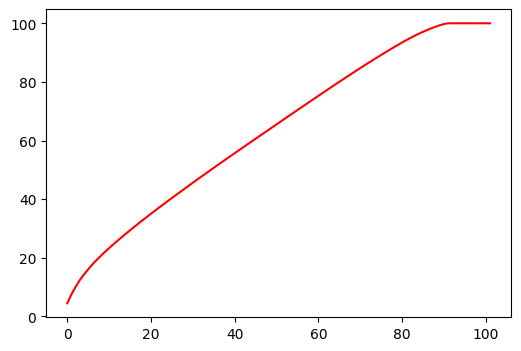

In [53]:
 #Variance plot for PCA components obtained
''' Variance increases upto 90 and post that it is constant : Hence after performing pca we will only consider the features upto 90'''
plt.figure(figsize=(6,4))
plt.plot(cum_var,color="red")


In [54]:
finaltrainset = pd.concat([pd.DataFrame(train_feature_pca[:,0:90]),traindata[['Salary']]], axis = 1)
finaltrainset

0         1         2         3         4         5         6  \
0     -0.550838 -2.381650 -0.591921  1.433211  0.340516  1.940931 -0.055056   
1      2.819158 -1.370855 -0.048113  0.060772  0.148609  0.494097  0.971070   
2     -0.793832  0.871804 -1.202131 -0.513685  0.452004  0.675599 -2.665003   
3      0.732942  2.502494  0.763990 -0.149514 -3.056486  0.166519  0.140931   
4     -1.070350 -1.638424  4.542395  0.260940  0.650488 -2.473710  2.483233   
...         ...       ...       ...       ...       ...       ...       ...   
30156 -0.766825 -1.596732 -0.037113 -0.576608  0.331904 -3.490439  2.320920   
30157  1.704432  1.785328 -0.594925 -0.692498 -0.411458 -1.251061 -0.505186   
30158 -2.378351 -0.798690  0.339106 -4.067833  0.281604 -1.215646 -0.253538   
30159 -1.975477  1.193052 -1.828994  1.598638 -0.633416 -0.187607  0.789310   
30160  0.762132 -1.772009  0.536972 -2.417460  0.352371 -1.720856  2.466035   

              7         8         9  ...        81        82        83  \
0      0.515267 -0.603118 -1.349744  ...  0.925827  0.366843  0.762292   
1      0.977166 -1.058340  1.543212  ...  1.715245 -0.684681  0.173783   
2      0.041210  0.966047 -0.942719  ...  0.666397 -0.126942 -0.368158   
3     -2.430582  0.155941  1.066790  ...  0.058897  0.409911  0.952768   
4     -2.795740 -0.249688  1.001833  ... -1.388747  0.857151 -1.132278   
...         ...       ...       ...  ...       ...       ...       ...   
30156 -0.117277 -0.388185 -1.112954  ... -0.680328  0.177364 -0.265304   
30157 -0.513443  1.286209 -0.530841  ...  0.603116 -0.279650  0.035936   
30158  1.090962  0.960431  0.065679  ... -1.205160  0.177494  0.668585   
30159  0.860548  0.808205 -0.906124  ...  1.329776 -0.312235  0.180269   
30160  1.201089  0.049580  2.336657  ... -0.101924 -0.081743 -1.601187   

             84        85        86        87        88        89  Salary  
0      0.955908 -0.431471 -0.253518 -0.090683  1.446239  0.537054   <=50K  
1     -1.120804  1.043838 -1.127099  0.538383 -0.179721  0.006457   <=50K  
2      0.399572  0.094164 -0.001750 -0.622668  0.114582  0.079789   <=50K  
3      0.193645  0.292208  0.033568 -0.226799 -0.779685  0.367130   <=50K  
4      0.924125  0.087501 -0.409813 -0.711475  0.566080 -1.599465   <=50K  
...         ...       ...       ...       ...       ...       ...     ...  
30156 -0.170305  0.307492 -0.087299 -0.407937  1.072890 -0.389103   <=50K  
30157  0.532717 -0.070438 -0.160400  0.100112 -0.124855  0.253184    >50K  
30158  0.528450  0.580482  0.156868 -0.442096  0.753165 -0.657852   <=50K  
30159 -1.124998  0.500770 -0.047237 -0.227867  0.993340 -0.939524   <=50K  
30160 -0.338971  0.643763 -0.635779  0.200448  0.645174 -0.861073    >50K  

[30161 rows x 91 columns]

In [55]:
finaltestset = pd.concat([pd.DataFrame(test_feature_pca[:,0:90]),testdata[["Salary"]]],axis=1)
finaltestset

0         1         2         3         4         5         6  \
0     -0.550838 -2.381650 -0.591921  1.433211  0.340516  1.940931 -0.055056   
1      2.819158 -1.370855 -0.048113  0.060772  0.148609  0.494097  0.971070   
2     -0.793832  0.871804 -1.202131 -0.513685  0.452004  0.675599 -2.665003   
3      0.732942  2.502494  0.763990 -0.149514 -3.056486  0.166519  0.140931   
4     -1.070350 -1.638424  4.542395  0.260940  0.650488 -2.473710  2.483233   
...         ...       ...       ...       ...       ...       ...       ...   
30156 -0.766825 -1.596732 -0.037113 -0.576608  0.331904 -3.490439  2.320920   
30157  1.704432  1.785328 -0.594925 -0.692498 -0.411458 -1.251061 -0.505186   
30158 -2.378351 -0.798690  0.339106 -4.067833  0.281604 -1.215646 -0.253538   
30159 -1.975477  1.193052 -1.828994  1.598638 -0.633416 -0.187607  0.789310   
30160  0.762132 -1.772009  0.536972 -2.417460  0.352371 -1.720856  2.466035   

              7         8         9  ...        81        82        83  \
0      0.515267 -0.603118 -1.349744  ...  0.925827  0.366843  0.762292   
1      0.977166 -1.058340  1.543212  ...  1.715245 -0.684681  0.173783   
2      0.041210  0.966047 -0.942719  ...  0.666397 -0.126942 -0.368158   
3     -2.430582  0.155941  1.066790  ...  0.058897  0.409911  0.952768   
4     -2.795740 -0.249688  1.001833  ... -1.388747  0.857151 -1.132278   
...         ...       ...       ...  ...       ...       ...       ...   
30156 -0.117277 -0.388185 -1.112954  ... -0.680328  0.177364 -0.265304   
30157 -0.513443  1.286209 -0.530841  ...  0.603116 -0.279650  0.035936   
30158  1.090962  0.960431  0.065679  ... -1.205160  0.177494  0.668585   
30159  0.860548  0.808205 -0.906124  ...  1.329776 -0.312235  0.180269   
30160  1.201089  0.049580  2.336657  ... -0.101924 -0.081743 -1.601187   

             84        85        86        87        88        89  Salary  
0      0.955908 -0.431471 -0.253518 -0.090683  1.446239  0.537054   <=50K  
1     -1.120804  1.043838 -1.127099  0.538383 -0.179721  0.006457   <=50K  
2      0.399572  0.094164 -0.001750 -0.622668  0.114582  0.079789    >50K  
3      0.193645  0.292208  0.033568 -0.226799 -0.779685  0.367130    >50K  
4      0.924125  0.087501 -0.409813 -0.711475  0.566080 -1.599465   <=50K  
...         ...       ...       ...       ...       ...       ...     ...  
30156 -0.170305  0.307492 -0.087299 -0.407937  1.072890 -0.389103     NaN  
30157  0.532717 -0.070438 -0.160400  0.100112 -0.124855  0.253184     NaN  
30158  0.528450  0.580482  0.156868 -0.442096  0.753165 -0.657852     NaN  
30159 -1.124998  0.500770 -0.047237 -0.227867  0.993340 -0.939524     NaN  
30160 -0.338971  0.643763 -0.635779  0.200448  0.645174 -0.861073     NaN  

[30161 rows x 91 columns]

In [56]:
#X AND Y  for TRAINING DATA

xtrain = finaltrainset.values[0:2000,0:90]
ytrain = finaltrainset.values[0:2000,90]

In [57]:
clf = SVC()
param_grid = [{'kernel' : ["rbf","sigmiod"],
              'gamma': [0.5,0.1,0.01,0.001,0.001],
              'C':[15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0.1,0.001,0.0001]}]

In [58]:
gsv = GridSearchCV(clf, param_grid , cv=10)

In [59]:
gsv.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2,
                                1, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.01, 0.001, 0.001],
                          'kernel': ['rbf', 'sigmiod']}])

In [60]:
gsv.best_params_, gsv.best_score_

({'C': 4, 'gamma': 0.001, 'kernel': 'rbf'}, 0.8275)

In [61]:
#X AND Y  for TESTING DATA

xtest = finaltestset.values[0:2000,0:90]
ytest = finaltestset.values[0:2000,90]

In [62]:
clf = SVC(kernel = "rbf" , gamma = 0.001 , C= 10)
clf.fit(xtrain,ytrain)
ypred = clf.predict(xtest)
print("THE TRAINING SCORE IS ",clf.score(xtrain,ytrain))
print("************************************")
print("THE TESTING SCORE IS ",clf.score(xtest,ytest))
print("************************************")
print(classification_report(ytest,ypred))


THE TRAINING SCORE IS  0.853
************************************
THE TESTING SCORE IS  0.653
************************************
              precision    recall  f1-score   support

       <=50K       0.76      0.80      0.78      1506
        >50K       0.26      0.21      0.23       494

    accuracy                           0.65      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.63      0.65      0.64      2000



In [63]:
acc= accuracy_score(ytest, ypred)*100
print('Accuracy :', acc)
confusion_matrix(ytest, ypred)

Accuracy : 65.3


array([[1200,  306],
       [ 388,  106]])

2) Classify the Size_Categorie using SVM<BR><BR>

* month	month of the year: 'jan' to 'dec'<BR>
* day	day of the week: 'mon' to 'sun'<BR>
* FFMC	FFMC index from the FWI system: 18.7 to 96.20<BR>
* DMC	DMC index from the FWI system: 1.1 to 291.3<BR>
* DC	DC index from the FWI system: 7.9 to 860.6<BR>
* ISI	ISI index from the FWI system: 0.0 to 56.10<BR>
* temp	temperature in Celsius degrees: 2.2 to 33.30<BR>
* RH	relative humidity in %: 15.0 to 100<BR>
* wind	wind speed in km/h: 0.40 to 9.40<BR>
* rain	outside rain in mm/m2 : 0.0 to 6.4<BR>
* Size_Categorie 	the burned area of the forest ( Small , Large)

In [ ]:
fires=pd.read_csv('/content/forestfires (1).csv')
fires

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [ ]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
fires.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
fires.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  517.000000  517.000000   517.000000  517.000000  ...  517.000000   
mean     4.017602    0.021663    12.847292    0.164410  ...    0.017408   
std      1.791653    0.295959    63.655818    0.371006  ...    0.130913   
min      0.400000    0.000000     0.000000    0.000000  ...    0.000000   
25%      2.700000    0.000000     0.000000    0.000000  ...    0.000000   
50%      4.000000    0.000000     0.520000    0.000000  ...    0.000000   
75%      4.900000    0.000000     6.570000    0.000000  ...    0.000000   
max      9.400000    6.400000  1090.840000    1.000000  ...    1.000000   

         monthfeb    monthjan    monthjul    monthjun    monthmar    monthmay  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.038685    0.003868    0.061896    0.032882    0.104449    0.003868   
std      0.193029    0.062137    0.241199    0.178500    0.306138    0.062137   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         monthnov    monthoct    monthsep  
count  517.000000  517.000000  517.000000  
mean     0.001934    0.029014    0.332689  
std      0.043980    0.168007    0.471632  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 28 columns]

In [ ]:
fires.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [ ]:
fires['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

Comment:<br>
* There is no null value in the data.
* Data is imbalanced.

In [ ]:
#Fetching Numerical and Categorical Columns

numerical_features=fires.select_dtypes(include=['number'])
print('Numerical Features: \n',numerical_features.columns)
print('\n\n')
categorical_features=fires.select_dtypes(exclude=['number'])
print('Categorical Features: \n',categorical_features.columns)


Numerical Features: 
 Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep'],
      dtype='object')



Categorical Features: 
 Index(['month', 'day', 'size_category'], dtype='object')


In [ ]:
#Let us determine the unique labels in the categorical columns

for i in categorical_features:
  print(i,'contains',len(fires[i].unique()),'labels')

month contains 12 labels
day contains 7 labels
size_category contains 2 labels


In [ ]:
#Now let us print unique value counts for categorical features

for i in categorical_features:
  print(f"Unique value count for '{i}: ")
  print()
  print(fires[i].value_counts())

Unique value count for 'month: 

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
Unique value count for 'day: 

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
Unique value count for 'size_category: 

small    378
large    139
Name: size_category, dtype: int64


Comment:<br>
* Here we can observe that most forest fire cases occurs in the month of august and september and less no of cases in the month of november.
* The occurence of small forest fires are more than large forest fires.
* Usually occcurs on sundays.

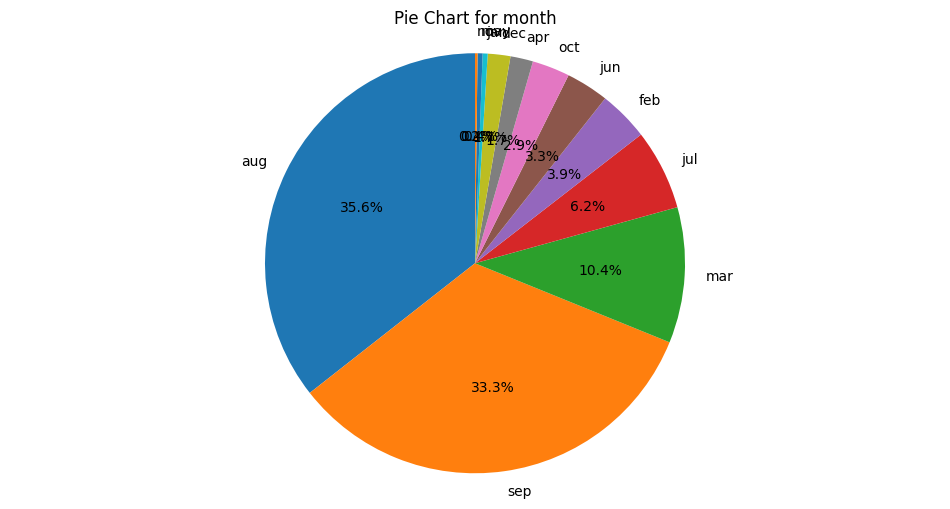

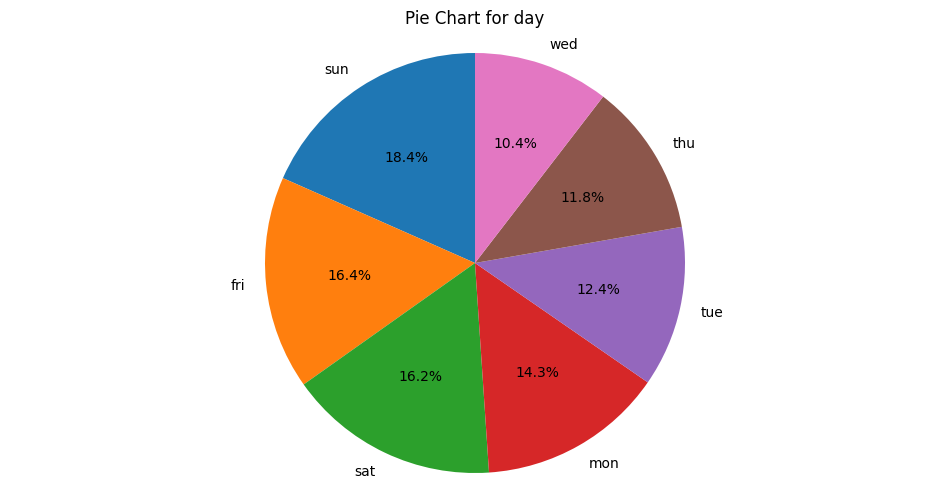

In [ ]:
categorical_feature=['month','day']

for col in categorical_feature:
    plt.figure(figsize=(12, 6))
    counts = fires[col].value_counts()
    labels = counts.index  # index here is the months , days and size category
    sizes = counts.values   # value counts of the categorical column : occurences
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart for {col}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()



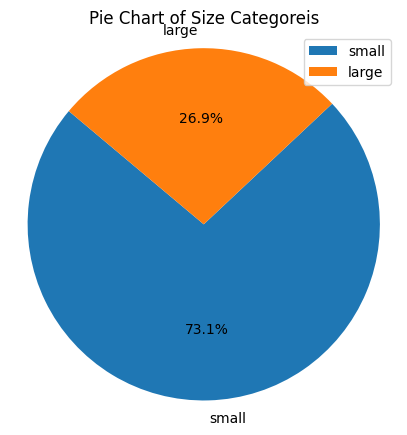

In [ ]:
proportions = (fires['size_category'].value_counts() / len(fires)) * 100

# Plotting the pie chart
plt.figure(figsize=(5,5))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Size Categoreis')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Rotate the labels
plt.legend(proportions.index, loc="best")
# Show the pie chart
plt.show()

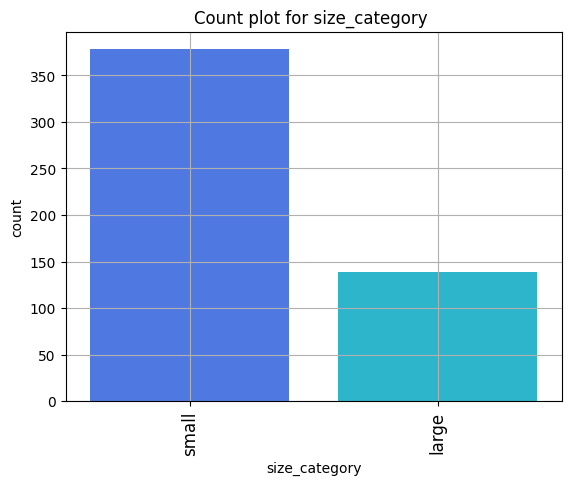

In [ ]:
for i in  categorical_features:
    colors = sns.color_palette('rainbow')
    sns.countplot(x=i, data=fires, palette = colors, order=fires[i].value_counts().index)
    plt.xticks(rotation = 90,fontsize = 12)
    plt.title(f"Count plot for {i} ")
    plt.grid(True)
    plt.show()



In [ ]:
#Understanding Numerical data

fires.corr()

FFMC       DMC        DC       ISI      temp        RH  \
FFMC      1.000000  0.382619  0.330512  0.531805  0.431532 -0.300995   
DMC       0.382619  1.000000  0.682192  0.305128  0.469594  0.073795   
DC        0.330512  0.682192  1.000000  0.229154  0.496208 -0.039192   
ISI       0.531805  0.305128  0.229154  1.000000  0.394287 -0.132517   
temp      0.431532  0.469594  0.496208  0.394287  1.000000 -0.527390   
RH       -0.300995  0.073795 -0.039192 -0.132517 -0.527390  1.000000   
wind     -0.028485 -0.105342 -0.203466  0.106826 -0.227116  0.069410   
rain      0.056702  0.074790  0.035861  0.067668  0.069491  0.099751   
area      0.040122  0.072994  0.049383  0.008258  0.097844 -0.075519   
dayfri    0.019306 -0.012010 -0.004220  0.046695 -0.071949  0.064506   
daymon   -0.059396 -0.107921 -0.052993 -0.158601 -0.136529  0.009376   
daysat   -0.019637 -0.003653 -0.035189 -0.038585  0.034899 -0.023869   
daysun   -0.089517  0.025355 -0.001431 -0.003243  0.014403  0.136220   
daythu    0.071730  0.087672  0.051859 -0.022406  0.051432 -0.123061   
daytue    0.011225  0.000016  0.028368  0.068610  0.035630 -0.014211   
daywed    0.093908  0.017939  0.024803  0.125415  0.090580 -0.087508   
monthapr -0.117199 -0.197543 -0.268211 -0.106478 -0.157051  0.021235   
monthaug  0.228103  0.497928  0.279361  0.334639  0.351404  0.054761   
monthdec -0.137044 -0.176301 -0.105642 -0.162322 -0.329648 -0.047714   
monthfeb -0.281535 -0.317899 -0.399277 -0.249777 -0.320015  0.140430   
monthjan -0.454771 -0.105647 -0.115064 -0.103588 -0.146520  0.170923   
monthjul  0.031833 -0.001946 -0.100887  0.020982  0.142588  0.013185   
monthjun -0.040634 -0.050403 -0.186183  0.111516  0.051015  0.009382   
monthmar -0.074327 -0.407404 -0.650427 -0.143520 -0.341797 -0.089836   
monthmay -0.037230 -0.081980 -0.114209 -0.060493 -0.045540  0.086822   
monthnov -0.088964 -0.074218 -0.078380 -0.076559 -0.053798 -0.035885   
monthoct -0.005998 -0.187632  0.093279 -0.071154 -0.053513 -0.072334   
monthsep  0.076609  0.110907  0.531857 -0.068877  0.088006 -0.062596   

              wind      rain      area    dayfri  ...  monthdec  monthfeb  \
FFMC     -0.028485  0.056702  0.040122  0.019306  ... -0.137044 -0.281535   
DMC      -0.105342  0.074790  0.072994 -0.012010  ... -0.176301 -0.317899   
DC       -0.203466  0.035861  0.049383 -0.004220  ... -0.105642 -0.399277   
ISI       0.106826  0.067668  0.008258  0.046695  ... -0.162322 -0.249777   
temp     -0.227116  0.069491  0.097844 -0.071949  ... -0.329648 -0.320015   
RH        0.069410  0.099751 -0.075519  0.064506  ... -0.047714  0.140430   
wind      1.000000  0.061119  0.012317  0.118090  ...  0.269702 -0.029431   
rain      0.061119  1.000000 -0.007366 -0.004261  ... -0.009752 -0.014698   
area      0.012317 -0.007366  1.000000 -0.052911  ...  0.001010 -0.020732   
dayfri    0.118090 -0.004261 -0.052911  1.000000  ... -0.019140  0.046323   
daymon   -0.063881 -0.029945 -0.021206 -0.181293  ...  0.114519  0.003933   
daysat   -0.063799 -0.032271  0.087868 -0.195372  ... -0.058625  0.020406   
daysun    0.027981 -0.017872 -0.020463 -0.210462  ... -0.024966  0.008416   
daythu   -0.062553 -0.026798  0.020121 -0.162237  ... -0.002838 -0.042278   
daytue    0.053396  0.139311 -0.001333 -0.166728  ... -0.005125 -0.014491   
daywed   -0.019965 -0.020744 -0.011452 -0.151487  ...  0.002899 -0.035713   
monthapr  0.048266 -0.009752 -0.008280 -0.019140  ... -0.017717 -0.026701   
monthaug  0.028577  0.093101 -0.004187 -0.100837  ... -0.098941 -0.149116   
monthdec  0.269702 -0.009752  0.001010 -0.019140  ...  1.000000 -0.026701   
monthfeb -0.029431 -0.014698 -0.020732  0.046323  ... -0.026701  1.000000   
monthjan -0.070245 -0.004566 -0.012589 -0.027643  ... -0.008295 -0.012501   
monthjul -0.040645 -0.013390  0.006149 -0.048969  ... -0.034190 -0.051528   
monthjun  0.012124 -0.013510 -0.020314  0.006000  ... -0.024543 -0.036989   
monthmar  0.181433 -0.020744 -0.045596  0.036205  ... -0.045456 -0.068508   


In [ ]:
#Plotting heatmap

fig=plt.figure(figsize=(20,10))
sns.heatmap(data=fires.corr(),annot=True)

<Axes: >

In [ ]:
numerical_features.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep'],
      dtype='object')

FFMC vs Size Category


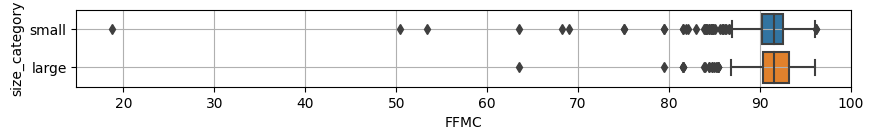

DMC vs Size Category


DC vs Size Category


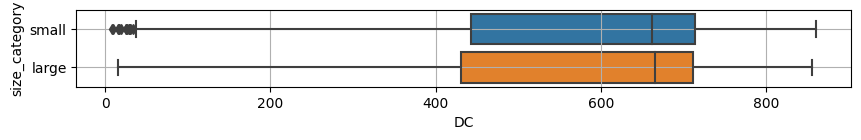

ISI vs Size Category


temp vs Size Category


RH vs Size Category


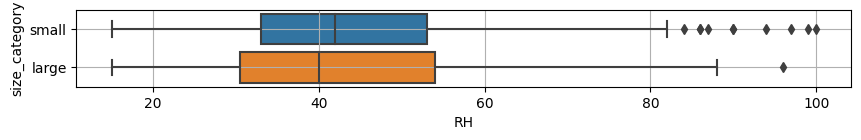

wind vs Size Category


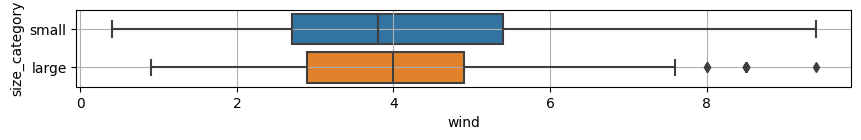

rain vs Size Category


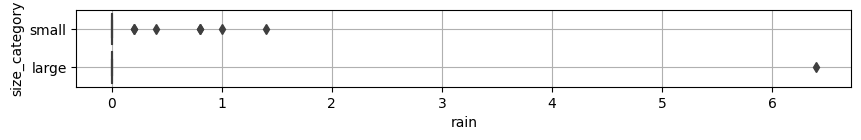

area vs Size Category


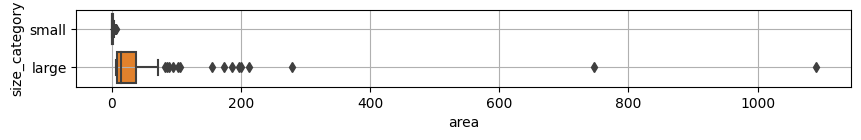

dayfri vs Size Category


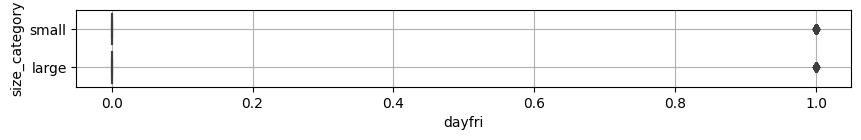

daymon vs Size Category


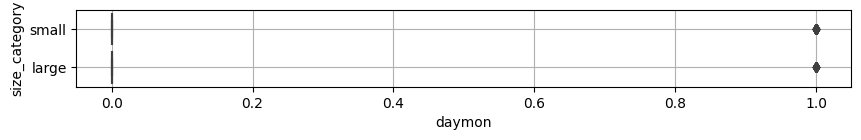

daysat vs Size Category


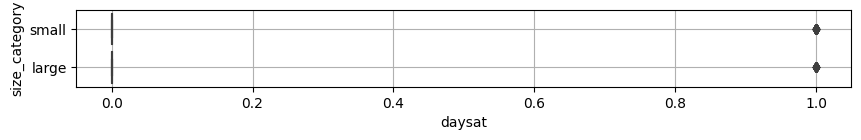

daysun vs Size Category


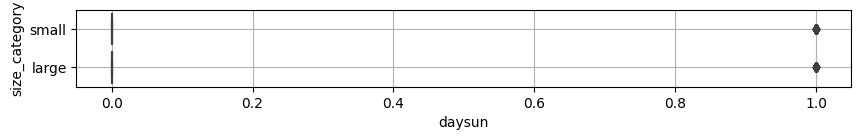

daythu vs Size Category


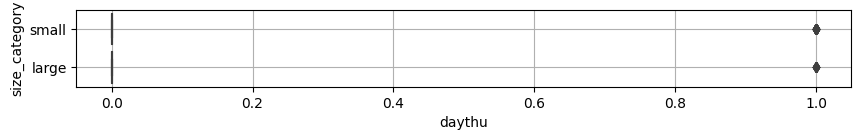

daytue vs Size Category


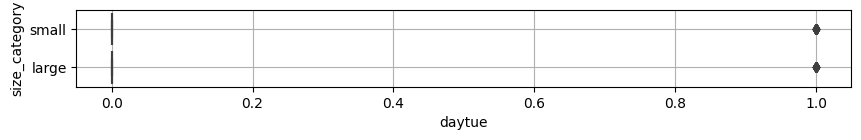

daywed vs Size Category


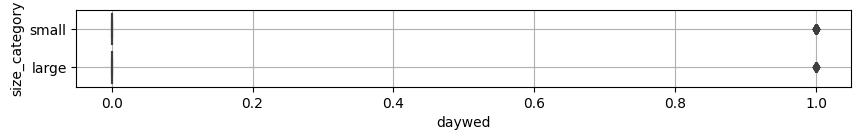

monthapr vs Size Category


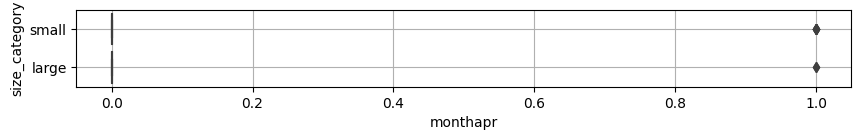

monthaug vs Size Category


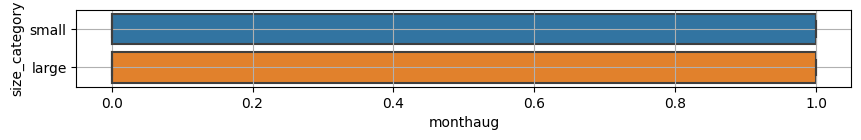

monthdec vs Size Category


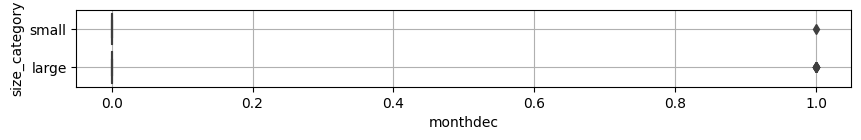

monthfeb vs Size Category


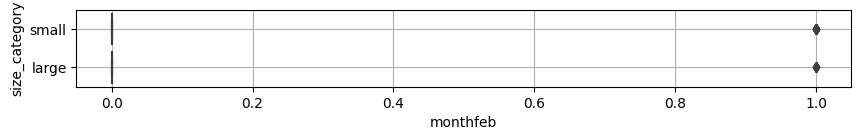

monthjan vs Size Category


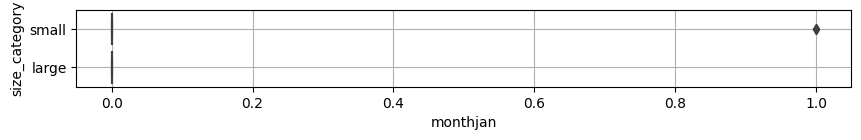

monthjul vs Size Category


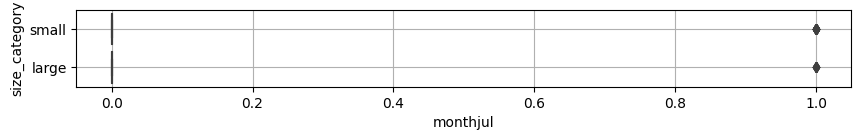

monthjun vs Size Category


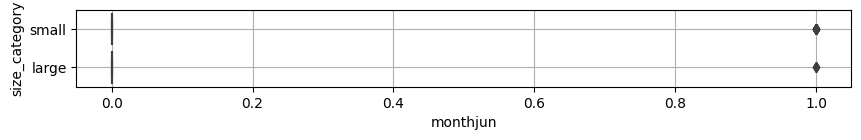

monthmar vs Size Category


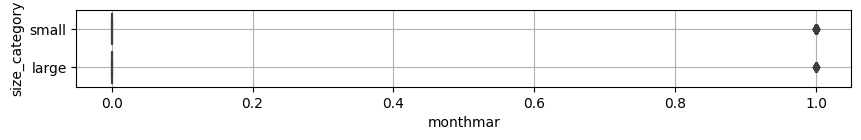

monthmay vs Size Category


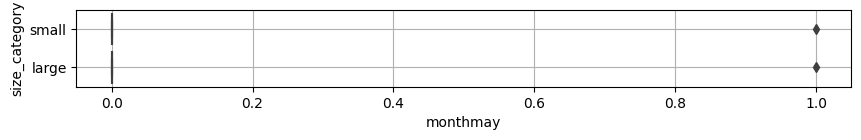

monthnov vs Size Category


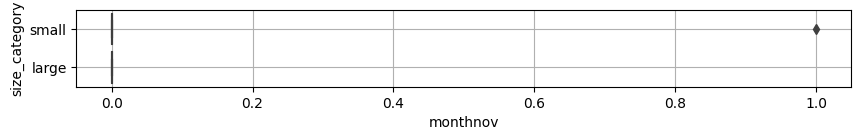

monthoct vs Size Category


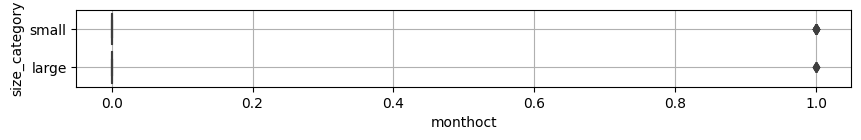

monthsep vs Size Category


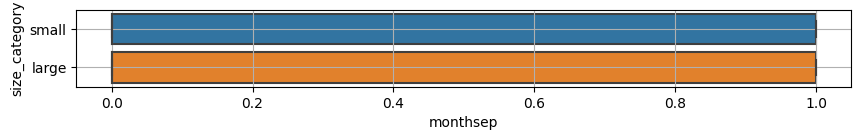

In [ ]:
for i in numerical_features:
      fig=plt.figure(figsize=(10,1))
      sns.boxplot(x=i,y=fires['size_category'],data=fires)
      plt.grid(True)
      print(f"{i} vs Size Category")
      plt.show()

FFMC vs Size Category


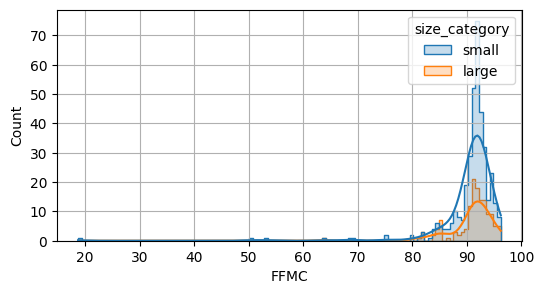

DMC vs Size Category


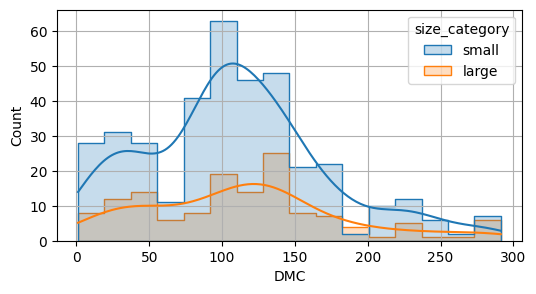

DC vs Size Category


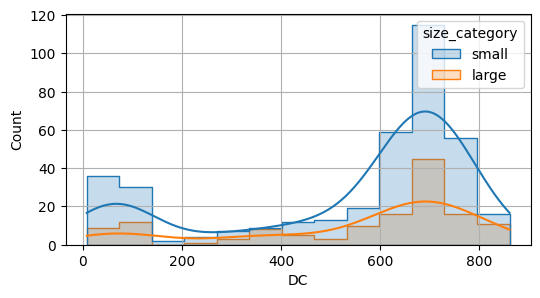

ISI vs Size Category


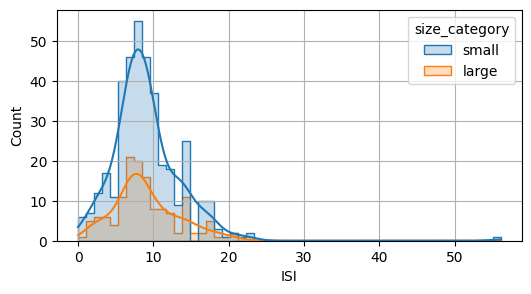

temp vs Size Category


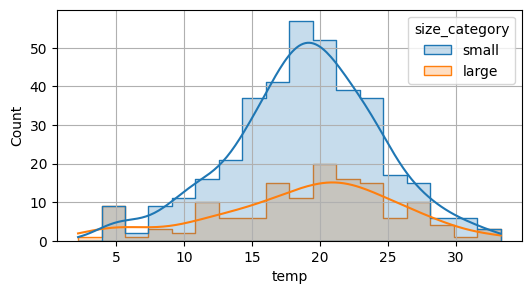

RH vs Size Category


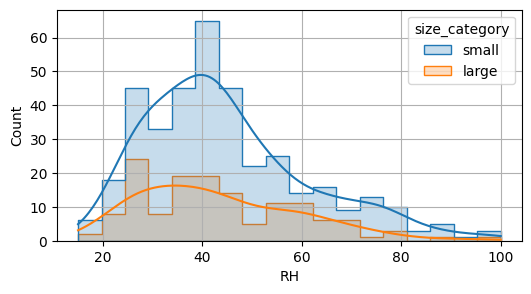

wind vs Size Category


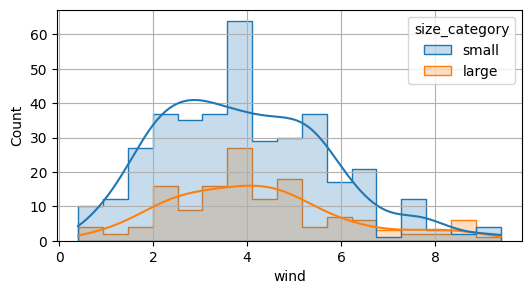

rain vs Size Category


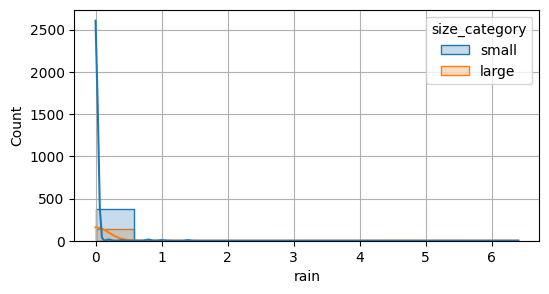

area vs Size Category


dayfri vs Size Category


daymon vs Size Category


daysat vs Size Category


daysun vs Size Category


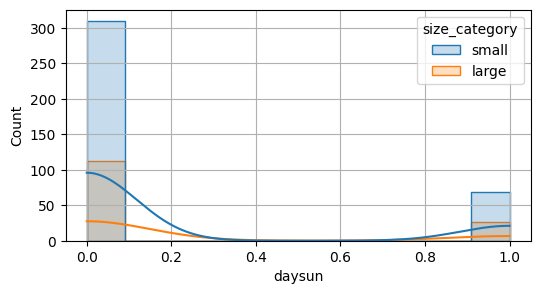

daythu vs Size Category


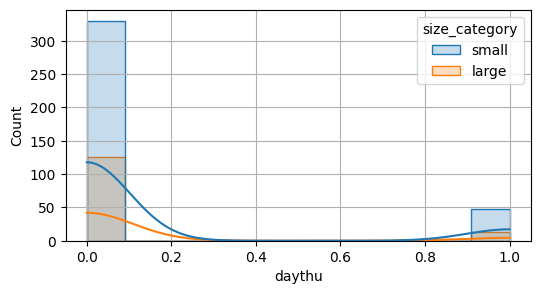

daytue vs Size Category


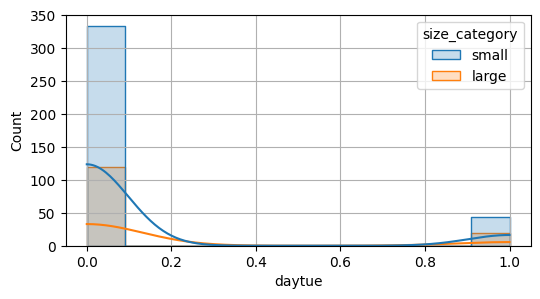

daywed vs Size Category


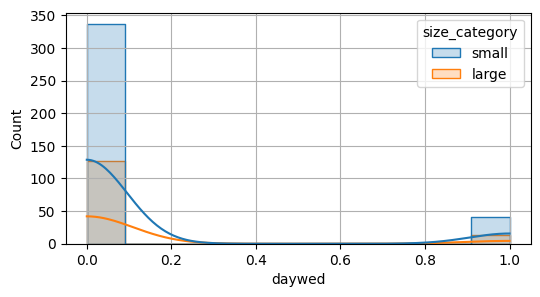

monthapr vs Size Category


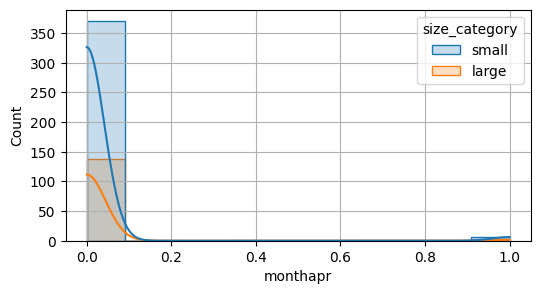

monthaug vs Size Category


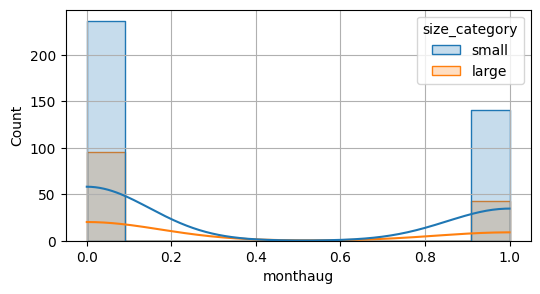

monthdec vs Size Category


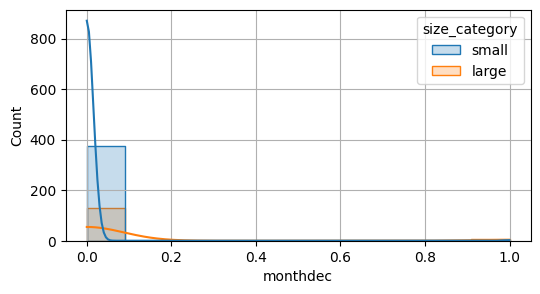

monthfeb vs Size Category


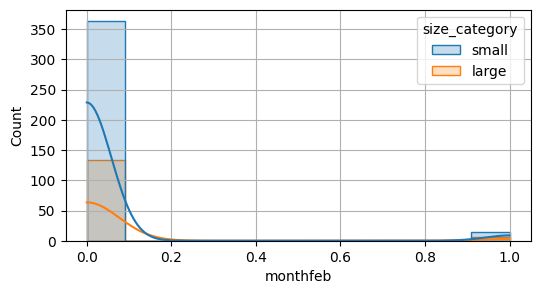

monthjan vs Size Category


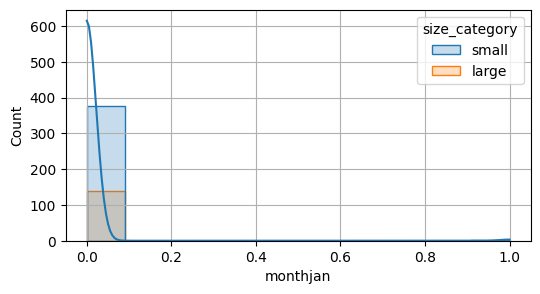

monthjul vs Size Category


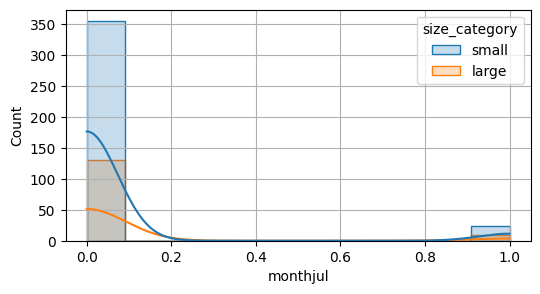

monthjun vs Size Category


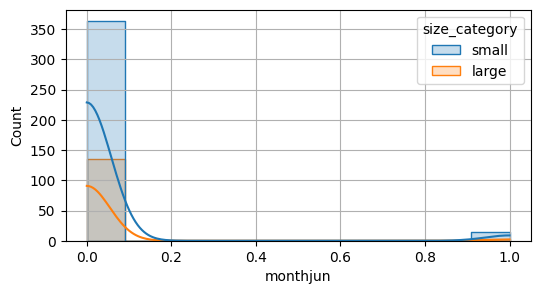

monthmar vs Size Category


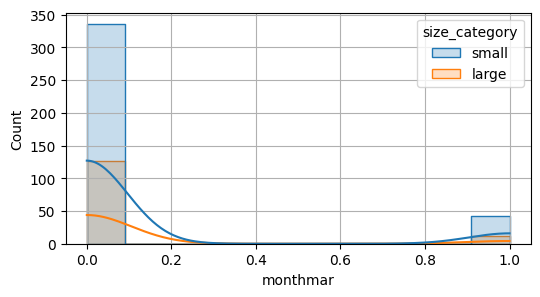

monthmay vs Size Category


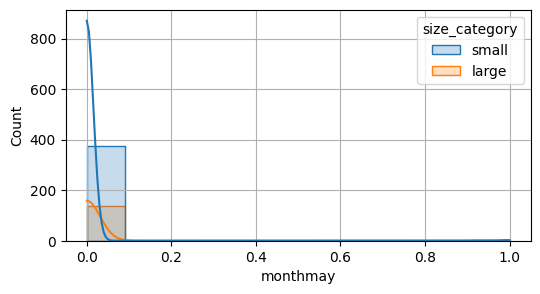

monthnov vs Size Category


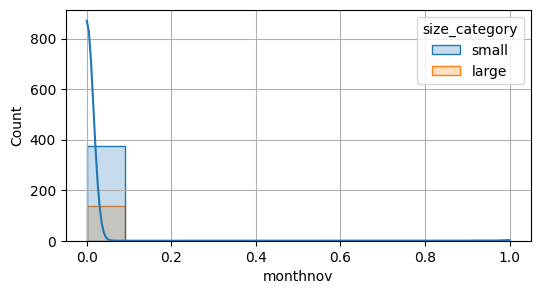

monthoct vs Size Category


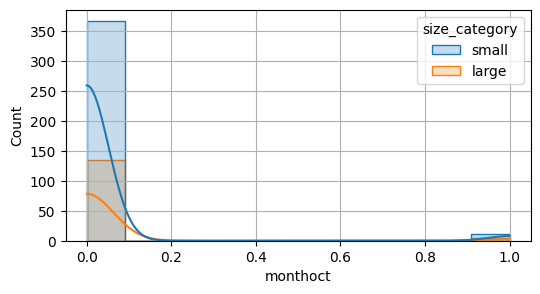

monthsep vs Size Category


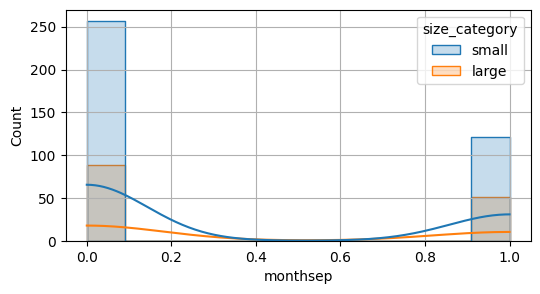

In [ ]:
# Now let us plot to observe the normal distribution to see the mean distri

for i in numerical_features:
  plt.figure(figsize=(6,3))
  sns.histplot(data=fires,x=i,hue=fires['size_category'],kde=True,element='step')
  plt.grid(True)
  print(f'{i} vs Size Category')
  plt.show()

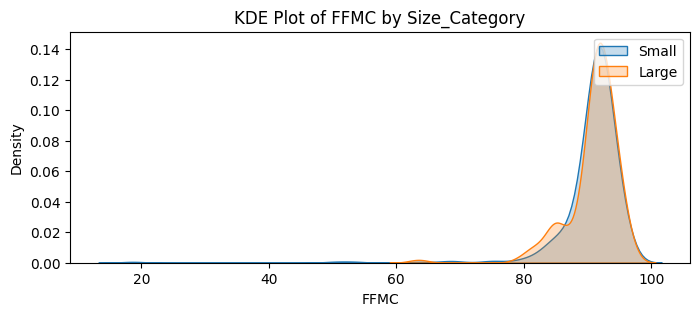

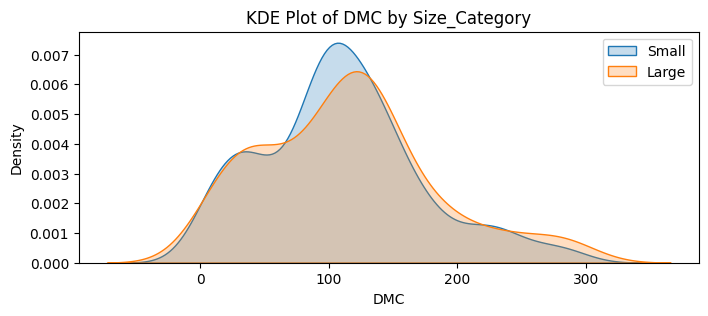

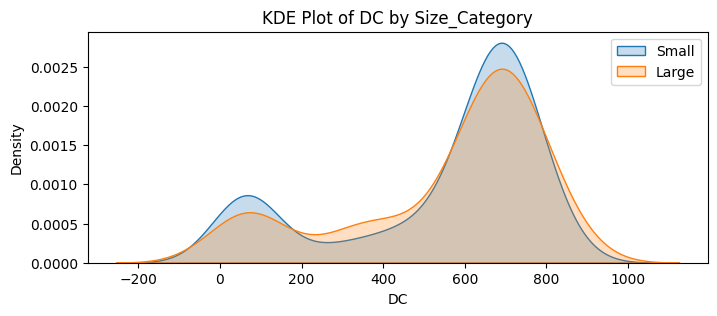

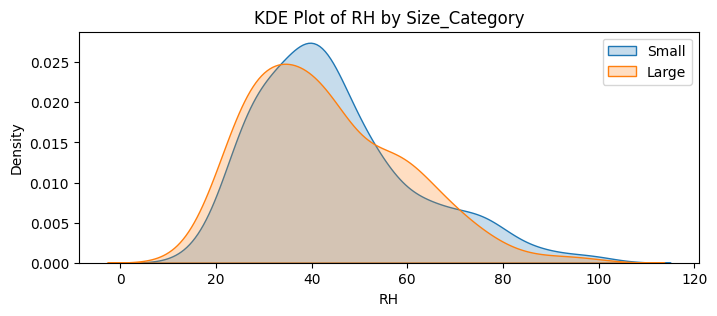

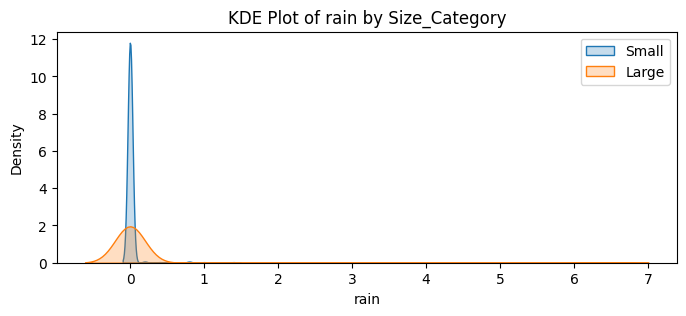

In [ ]:
#Create KDE plots for the selected feature, separated by 'Size_Categorie'

feature=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
for i in feature:
  plt.figure(figsize=(8,3))
  sns.kdeplot(data=fires[fires['size_category'] == 'small'][i], label='Small', shade=True)
  sns.kdeplot(data=fires[fires['size_category'] == 'large'][i], label='Large', shade=True)
  plt.title(f'KDE Plot of {i} by Size_Category')
  plt.xlabel(i)
  plt.ylabel('Density')
  plt.legend()
  plt.show()



In [ ]:
fires.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 31 columns]

In [ ]:
fires['size_category']=np.where(fires['size_category'].str.contains('large'),1,0)

In [ ]:
fires.sample()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
186   mar  sun  89.3  51.3  102.2  9.6  11.5  39   5.8   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
186         0         0         0         1         0         0         0   

     monthsep  size_category  
186         0              1  

[1 rows x 31 columns]

In [ ]:
#dividing the data into feature and target variable

features=fires.iloc[:,2:-1]
y=fires['size_category']

In [ ]:
#Scaling the features

scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)

In [ ]:
#Splitting the data to train the model

x_train,x_test,y_train,y_test=train_test_split(scaled_features,y,test_size=0.2,random_state=10)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(413, 28)
(104, 28)
(413,)
(104,)


## Model Building


In [ ]:
#Support vector classofication model

clf=SVC()

In [ ]:
clf.fit(x_train,y_train)

SVC()

In [ ]:
y_pred_train=clf.predict(x_train)

In [ ]:
print('Train Result')
print('=======================================================================')
print('Accuracy Score:-',accuracy_score(y_train,y_pred_train))
print('_______________________________________________________________________')
print('Classification Report: \n',classification_report(y_train,y_pred_train))
print('_______________________________________________________________________')
print('Confussion Matrix: \n',confusion_matrix(y_train,y_pred_train))

Train Result
Accuracy Score:- 0.7893462469733656
_______________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      1.00      0.87       303
           1       1.00      0.21      0.35       110

    accuracy                           0.79       413
   macro avg       0.89      0.60      0.61       413
weighted avg       0.84      0.79      0.73       413

_______________________________________________________________________
Confussion Matrix: 
 [[303   0]
 [ 87  23]]


In [ ]:
y_pred_test=clf.predict(x_test)

In [ ]:
print('Train Result')
print('=======================================================================')
print('Accuracy Score:-',accuracy_score(y_test,y_pred_test))
print('_______________________________________________________________________')
print('Classification Report: \n',classification_report(y_test,y_pred_test))
print('_______________________________________________________________________')
print('Confussion Matrix: \n',confusion_matrix(y_test,y_pred_test))

Train Result
Accuracy Score:- 0.7692307692307693
_______________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.99      0.86        75
           1       0.86      0.21      0.33        29

    accuracy                           0.77       104
   macro avg       0.81      0.60      0.60       104
weighted avg       0.79      0.77      0.71       104

_______________________________________________________________________
Confussion Matrix: 
 [[74  1]
 [23  6]]


In [ ]:
clf=SVC()
clf.fit(x_train,y_train)
print('Accuracy on testing data is',clf.score(x_test,y_test))
print('Accuracy on training data is',clf.score(x_train,y_train))

Accuracy on testing data is 0.7692307692307693
Accuracy on training data is 0.7893462469733656


Comment:<br>
* Without giving any hyperparameter our traing and testing accuracy is low i.e, arround 75%
* There is no problem of overfitting.

### Now we will search for best hyperparmeters

In [ ]:
kernel=['linear','rbf','poly','sigmoid']
for i in kernel:
  model=SVC(kernel=i,C=1)
  model.fit(x_train,y_train)
  print('For kernel :',i)
  print('Accuracy is :',model.score(x_test,y_test))

For kernel : linear
Accuracy is : 0.9038461538461539
For kernel : rbf
Accuracy is : 0.7692307692307693
For kernel : poly
Accuracy is : 0.7307692307692307
For kernel : sigmoid
Accuracy is : 0.7692307692307693


In [ ]:
#linear kernel is giving good result

In [ ]:
#Hyperparameter 'degree' is only valid when kernel is 'poly'
for i in range(1,10):
  model=SVC(kernel='poly',degree=i)
  model.fit(x_train,y_train)
  print('Accuracy on training data :\t',model.score(x_train,y_train))
  print('Accuracy on testing data :\t',model.score(x_test,y_test))

Accuracy on training data :	 0.784503631961259
Accuracy on testing data :	 0.8076923076923077
Accuracy on training data :	 0.774818401937046
Accuracy on testing data :	 0.7307692307692307
Accuracy on training data :	 0.7796610169491526
Accuracy on testing data :	 0.7307692307692307
Accuracy on training data :	 0.774818401937046
Accuracy on testing data :	 0.7307692307692307
Accuracy on training data :	 0.7820823244552058
Accuracy on testing data :	 0.7307692307692307
Accuracy on training data :	 0.7820823244552058
Accuracy on testing data :	 0.7403846153846154
Accuracy on training data :	 0.784503631961259
Accuracy on testing data :	 0.7403846153846154
Accuracy on training data :	 0.7869249394673123
Accuracy on testing data :	 0.75
Accuracy on training data :	 0.7869249394673123
Accuracy on testing data :	 0.75


In [ ]:
#not so good result with polynomial kernel with different degree

### Hyperparameter selection using GridSearchCV

In [ ]:
clf=SVC()
param_grid=[{'kernel':['rbf','sigmoid','linear','poly'],'gamma':[0.5,0.1,0.01,0.001,0.0001],
             'degree':[2,3,4],'C':[15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0.1,0.001,0.0001]}]


In [ ]:
gsv=GridSearchCV(clf,param_grid,cv=5)
gsv

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2,
                                1, 0.1, 0.001, 0.0001],
                          'degree': [2, 3, 4],
                          'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf', 'sigmoid', 'linear', 'poly']}])

In [ ]:
gsv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2,
                                1, 0.1, 0.001, 0.0001],
                          'degree': [2, 3, 4],
                          'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf', 'sigmoid', 'linear', 'poly']}])

In [ ]:
gsv.best_params_,gsv.best_score_

({'C': 14, 'degree': 2, 'gamma': 0.5, 'kernel': 'linear'}, 0.9612400822803409)

## Hyperparameter Tunning

In [ ]:
clf=SVC(kernel='linear',gamma=0.5,C=14,degree=2)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print('Training Score =',clf.score(x_train,y_train))
print('********************************************************')
print('Testing Score =',clf.score(x_test,y_test))
print('********************************************************')
print('Classification Reprot : \n',classification_report(y_test,y_pred))

Training Score = 0.9854721549636803
********************************************************
Testing Score = 0.9711538461538461
********************************************************
Classification Reprot : 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        75
           1       0.91      1.00      0.95        29

    accuracy                           0.97       104
   macro avg       0.95      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104

